## Copyright 2019 The TensorFlow Authors.
@Adaptado por Renato Suguiy


---



# **Previsão do Valor de Ações usando Recurrent Neural Network**

## Trabalho feito para a matéria de Deep Learning da Pós-Graduação em Ciência de Dados ofertado pela PUCPR - Curutiba.
## Ministrado pelo professor Alceu de Souza Britto Jr.
## Elaborado por Renato Suguiy

In [5]:
from __future__ import absolute_import, division, print_function, unicode_literals
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass
import tensorflow as tf

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
from tensorflow.keras.callbacks import EarlyStopping

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

In [6]:
#Carrega base da dados direto do Driver e nomeia as colunas
csv_path='/content/drive/My Drive/Pós Ciencia de Dados/Deep Learning/TRABALHO DEEP LEARNING/Trabalho2/Base de Ações Trabalho.xlsx' 
df = pd.read_excel(csv_path, header= 1, names=['dataIBOV', 'valorIBOV','nulo1','dataPetro4', 'valorPetro4','nulo2','dataVale3', 'valorVale3', 'nulo3','dataDolar', 'valorDolar'])

Visualização dos Dados

In [8]:
df.head(12)

,dataIBOV,valorIBOV,nulo1,dataPetro4,valorPetro4,nulo2,dataVale3,valorVale3,nulo3,dataDolar,valorDolar
0,2017-07-26 16:56:00.384,65010.57,NaN,2017-07-26 16:56:00.384,13.06,NaN,2017-07-26 16:56:00.384,29.66,NaN,2017-07-26 23:57:59.904,3.1375
1,2017-07-27 16:56:00.384,65277.38,NaN,2017-07-27 16:56:00.384,13.00,NaN,2017-07-27 16:56:00.384,29.70,NaN,2017-07-27 23:57:59.904,3.1526
2,2017-07-28 16:56:00.384,65497.13,NaN,2017-07-28 16:56:00.384,13.13,NaN,2017-07-28 16:56:00.384,30.34,NaN,2017-07-28 23:57:59.904,3.1269
3,2017-07-31 16:56:00.384,65920.36,NaN,2017-07-31 16:56:00.384,13.29,NaN,2017-07-31 16:56:00.384,31.30,NaN,2017-07-29 23:57:59.904,3.1311
4,2017-08-01 16:56:00.384,66516.24,NaN,2017-08-01 16:56:00.384,13.12,NaN,2017-08-01 16:56:00.384,31.06,NaN,2017-07-30 23:57:59.904,3.1777
5,2017-08-02 16:56:00.384,67135.99,NaN,2017-08-02 16:56:00.384,13.51,NaN,2017-08-02 16:56:00.384,31.11,NaN,2017-07-31 23:57:59.904,3.1258
6,2017-08-03 16:56:00.384,66777.13,NaN,2017-08-03 16:56:00.384,13.31,NaN,2017-08-03 16:56:00.384,30.68,NaN,2017-08-01 23:57:59.904,3.1228
7,2017-08-04 16:56:00.384,66897.99,NaN,2017-08-04 16:56:00.384,13.40,NaN,2017-08-04 16:56:00.384,31.23,NaN,2017-08-02 23:57:59.904,3.1122
8,2017-08-07 16:56:00.384,67939.66,NaN,2017-08-07 16:56:00.384,13.55,NaN,2017-08-07 16:56:00.384,32.42,NaN,2017-08-03 23:57:59.904,3.1115
9,2017-08-08 16:56:00.384,67898.94,NaN,2017-08-08 16:56:00.384,13.49,NaN,2017-08-08 16:56:00.384,32.05,NaN,2017-08-04 23:57:59.904,3.1175


As variáveis abaixo garantem padronização e reprodutibilidade

In [9]:
TRAIN_SPLIT = 480

In [10]:
tf.random.set_seed(13)

## Part 1: Previsão univalorada
Criando modelo utilizando apenas uma *feature* (ação). 


In [11]:
data = df['valorPetro4']

data.index = df['dataPetro4']
data = data.dropna() #Tira valores nulos

print ("Numero de Amostras: ", len(data))
print ("Vetor de valores:" , data.values)
data.head()


Numero de Amostras:  673
Vetor de valores: [13.06 13.   13.13 13.29 13.12 13.51 13.31 13.4  13.55 13.49 13.52 13.19
 12.95 13.08 13.15 13.13 13.05 13.6  13.34 13.79 13.76 13.8  13.88 13.87
 13.85 13.45 13.65 14.02 14.17 14.41 15.02 14.71 14.99 14.87 15.03 15.04
 15.04 15.04 15.14 15.87 15.67 15.69 15.84 15.56 15.31 15.34 15.3  15.4
 15.98 15.66 15.9  15.69 15.89 16.19 16.08 16.08 16.12 16.13 16.16 16.15
 16.22 16.51 16.72 16.73 17.03 16.78 16.77 16.9  16.94 17.43 16.5  16.95
 16.72 16.72 16.64 15.35 15.81 16.02 15.9  16.11 16.19 16.1  15.87 15.84
 15.33 15.38 15.61 15.48 15.31 15.52 15.26 15.35 15.38 15.49 15.18 15.01
 14.95 15.22 15.14 15.24 15.86 15.75 15.97 16.05 16.1  16.55 16.7  16.73
 16.83 17.03 17.03 16.8  17.25 17.3  17.35 17.65 18.36 18.22 18.26 18.47
 18.24 19.34 19.93 19.85 19.49 19.7  20.52 19.97 19.04 19.99 19.44 19.05
 18.77 19.25 19.4  19.42 20.05 20.44 20.25 20.74 21.12 21.52 21.5  21.46
 21.03 21.51 22.12 21.9  21.67 21.7  22.39 22.33 22.11 22.38 21.31 21.43
 20.93 21

dataPetro4
2017-07-26 16:56:00.384    13.06
2017-07-27 16:56:00.384    13.00
2017-07-28 16:56:00.384    13.13
2017-07-31 16:56:00.384    13.29
2017-08-01 16:56:00.384    13.12
Name: valorPetro4, dtype: float64

Abaixo plotamos o gráfico de variação da ação até  2020

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fe7d7bbda90>],
      dtype=object)

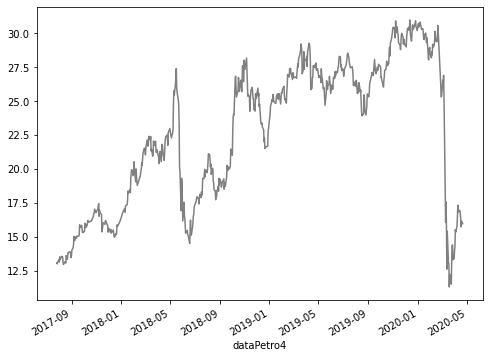

In [12]:
data.plot(subplots=True, color='gray')

Recuperando apenas o valores tabela e normalizando os dados
* Importante (Apenas utilizando os dados de treinamento)



In [13]:
uni_data = data.values
print ("Dados: ", uni_data)
uni_train_mean = uni_data[:TRAIN_SPLIT].mean()
print ("Média: ", uni_train_mean)
uni_train_std = uni_data[:TRAIN_SPLIT].std()
print ("Desv. Padrão: ", uni_train_std)
uni_data = (uni_data-uni_train_mean)/uni_train_std
print ("Dados Norm: ", uni_data)


Dados:  [13.06 13.   13.13 13.29 13.12 13.51 13.31 13.4  13.55 13.49 13.52 13.19
 12.95 13.08 13.15 13.13 13.05 13.6  13.34 13.79 13.76 13.8  13.88 13.87
 13.85 13.45 13.65 14.02 14.17 14.41 15.02 14.71 14.99 14.87 15.03 15.04
 15.04 15.04 15.14 15.87 15.67 15.69 15.84 15.56 15.31 15.34 15.3  15.4
 15.98 15.66 15.9  15.69 15.89 16.19 16.08 16.08 16.12 16.13 16.16 16.15
 16.22 16.51 16.72 16.73 17.03 16.78 16.77 16.9  16.94 17.43 16.5  16.95
 16.72 16.72 16.64 15.35 15.81 16.02 15.9  16.11 16.19 16.1  15.87 15.84
 15.33 15.38 15.61 15.48 15.31 15.52 15.26 15.35 15.38 15.49 15.18 15.01
 14.95 15.22 15.14 15.24 15.86 15.75 15.97 16.05 16.1  16.55 16.7  16.73
 16.83 17.03 17.03 16.8  17.25 17.3  17.35 17.65 18.36 18.22 18.26 18.47
 18.24 19.34 19.93 19.85 19.49 19.7  20.52 19.97 19.04 19.99 19.44 19.05
 18.77 19.25 19.4  19.42 20.05 20.44 20.25 20.74 21.12 21.52 21.5  21.46
 21.03 21.51 22.12 21.9  21.67 21.7  22.39 22.33 22.11 22.38 21.31 21.43
 20.93 21.16 22.05 21.72 21.75 22.03 21.44 2

**Criação dos Datasets de Treinamento e Validação**'

* A função abaixo retorna a fração do dataset a ser utilizada sendo:

          * history_size: janela a ser observada
          * target_size: O exato momento a ser avaliado 


In [14]:
def univariate_data(dataset, start_index, end_index, history_size, target_size):
  data = []
  labels = []

  start_index = start_index + history_size
  if end_index is None:
    end_index = len(dataset) - target_size

  for i in range(start_index, end_index):
    indices = range(i-history_size, i)
    # Reshape data from (history_size,) to (history_size, 1)
    data.append(np.reshape(dataset[indices], (history_size, 1)))
    labels.append(dataset[i+target_size])
  return np.array(data), np.array(labels)

In [15]:
'''Tamanho da Janela do Historico'''
univariate_past_history = 30  #n observacoes anteriores
future = univariate_future_target = 18 #n proxima observação 

x_train_uni, y_train_uni = univariate_data(uni_data, 0, TRAIN_SPLIT,
                                           univariate_past_history,
                                           univariate_future_target)
x_val_uni, y_val_uni = univariate_data(uni_data, TRAIN_SPLIT, None,
                                       univariate_past_history,
                                       univariate_future_target)
print (x_train_uni)

[[[-1.74266591]
  [-1.75539032]
  [-1.72782076]
  ...
  [-1.53907528]
  [-1.50726425]
  [-1.4563666 ]]

 [[-1.75539032]
  [-1.72782076]
  [-1.69388899]
  ...
  [-1.50726425]
  [-1.4563666 ]
  [-1.32700172]]

 [[-1.72782076]
  [-1.69388899]
  [-1.72994149]
  ...
  [-1.4563666 ]
  [-1.32700172]
  [-1.39274453]]

 ...

 [[ 1.02065262]
  [ 1.05246366]
  [ 1.17122485]
  ...
  [ 1.24120913]
  [ 1.29634826]
  [ 1.29846899]]

 [[ 1.05246366]
  [ 1.17122485]
  [ 1.10760278]
  ...
  [ 1.29634826]
  [ 1.29846899]
  [ 1.35148738]]

 [[ 1.17122485]
  [ 1.10760278]
  [ 1.03337704]
  ...
  [ 1.29846899]
  [ 1.35148738]
  [ 1.44055828]]]


Para efeito de visualização, analisamos as janelas de observações criadas e seu respectivo preço (label)

#Amostras: 450 #Labels:  450
Amostra[0]:
 [[-1.75539032]
 [-1.72782076]
 [-1.69388899]
 [-1.72994149]
 [-1.6472328 ]
 [-1.68964751]
 [-1.67056089]
 [-1.63874986]
 [-1.65147427]
 [-1.64511207]
 [-1.71509634]
 [-1.765994  ]
 [-1.73842443]
 [-1.72357928]
 [-1.72782076]
 [-1.74478664]
 [-1.62814618]
 [-1.68328531]
 [-1.5878522 ]
 [-1.59421441]
 [-1.58573147]
 [-1.56876558]
 [-1.57088632]
 [-1.57512779]
 [-1.65995722]
 [-1.6175425 ]
 [-1.53907528]
 [-1.50726425]
 [-1.4563666 ]
 [-1.32700172]] 
Temperatura:  -1.1912746411765847


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

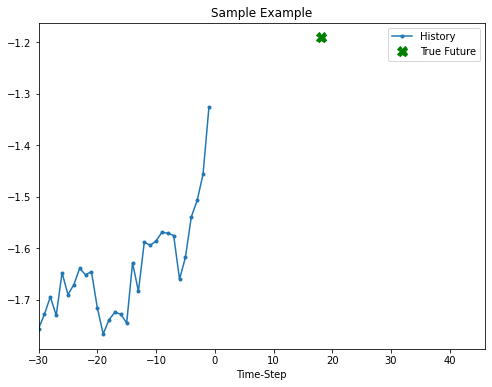

In [16]:
def create_time_steps(length):
  time_steps = []
  for i in range(-length, 0, 1):
    time_steps.append(i)
  return time_steps

def show_plot(plot_data, delta, title):
    labels = ['History', 'True Future', 'Model Prediction']
    marker = ['.-', 'gX', 'ro']
    time_steps = create_time_steps(plot_data[0].shape[0])
    if delta:
      future = delta
    else:
      future = 0

    plt.title(title)
    for i, x in enumerate(plot_data):
      if i:
        plt.plot(future, plot_data[i], marker[i], markersize=10,
                label=labels[i])
      else:
        plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt

sample_id = 1
print("#Amostras:", len(x_train_uni),"#Labels: ", len(y_train_uni))
print ("Amostra[0]:\n", x_train_uni[sample_id],"\nPreço: ", y_train_uni[sample_id])
show_plot([x_train_uni[sample_id], y_train_uni[sample_id]], future, 'Sample Example')

### Baseline
Para efeitos comparativos, vamos criar um modelo de predição utilizando a média das últimas 20 observações. Este simples modelo nos revela como a média pode ser falha para prever séries temporais

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py'>

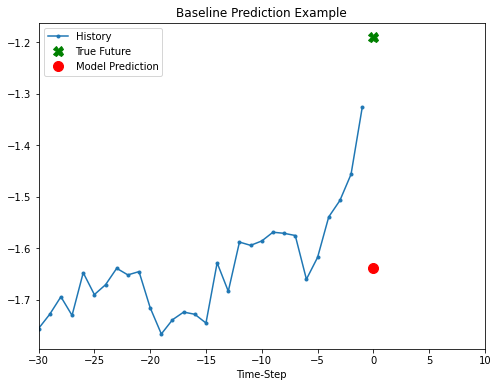

In [17]:
def baseline(history):
  return np.mean(history)

show_plot([x_train_uni[sample_id], y_train_uni[sample_id], baseline(x_train_uni[sample_id])], 0,
           'Baseline Prediction Example')

### Recurrent neural network (SimpleRNN and LSTM)

Definindo os datasets

In [18]:
BATCH_SIZE = 50
BUFFER_SIZE = 10000

train_univariate = tf.data.Dataset.from_tensor_slices((x_train_uni, y_train_uni))
train_univariate = train_univariate.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_univariate = tf.data.Dataset.from_tensor_slices((x_val_uni, y_val_uni))
val_univariate = val_univariate.batch(BATCH_SIZE).repeat()

## Criando as arquiteturas

RNN

In [19]:
simple_rnn_model = tf.keras.models.Sequential([
    tf.keras.layers.SimpleRNN(8, input_shape=(x_train_uni.shape[1], 
    x_train_uni.shape[2])),    
    tf.keras.layers.Dense(1)
])


simple_rnn_model.compile(optimizer='adam', loss='mae')

simple_rnn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 8)                 80        
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 89
Trainable params: 89
Non-trainable params: 0
_________________________________________________________________


LSTM


In [20]:
simple_lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(8, input_shape=(x_train_uni.shape[1], 
    x_train_uni.shape[2])),
    tf.keras.layers.Dense(1)
])

simple_lstm_model.compile(optimizer='adam', loss='mae')


simple_lstm_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 8)                 320       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 9         
Total params: 329
Trainable params: 329
Non-trainable params: 0
_________________________________________________________________


## Treinamento

Para poupar tempo, cada epoca conterá apenas 500 amostras ao invés da base toda. Podemos alterar este número depois para ver o impacto.

In [21]:
EVALUATION_INTERVAL = 500
EPOCHS = 25
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

RNN

In [22]:
rnn_log = simple_rnn_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50, callbacks=[es])

Epoch 1/25
500/500 [==============================] - 9s 18ms/step - loss: 0.4311 - val_loss: 0.7036
Epoch 2/25
500/500 [==============================] - 9s 18ms/step - loss: 0.3463 - val_loss: 0.6599
Epoch 3/25
500/500 [==============================] - 9s 18ms/step - loss: 0.3366 - val_loss: 0.6599
Epoch 4/25
500/500 [==============================] - 9s 18ms/step - loss: 0.3313 - val_loss: 0.6566
Epoch 5/25
500/500 [==============================] - 9s 18ms/step - loss: 0.3254 - val_loss: 0.6437
Epoch 6/25
500/500 [==============================] - 9s 18ms/step - loss: 0.3143 - val_loss: 0.6427
Epoch 7/25
500/500 [==============================] - 9s 17ms/step - loss: 0.3024 - val_loss: 0.6466
Epoch 00007: early stopping


LSTM

In [23]:
lstm_log = simple_lstm_model.fit(train_univariate, epochs=EPOCHS,
                      steps_per_epoch=EVALUATION_INTERVAL,
                      validation_data=val_univariate, validation_steps=50,callbacks=[es])

Epoch 1/25
500/500 [==============================] - 2s 4ms/step - loss: 0.4623 - val_loss: 0.8123
Epoch 2/25
500/500 [==============================] - 2s 4ms/step - loss: 0.3458 - val_loss: 0.7556
Epoch 3/25
500/500 [==============================] - 2s 4ms/step - loss: 0.3151 - val_loss: 0.7220
Epoch 4/25
500/500 [==============================] - 2s 3ms/step - loss: 0.2893 - val_loss: 0.7298
Epoch 00004: early stopping


## Visualização do Treinamento

In [24]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

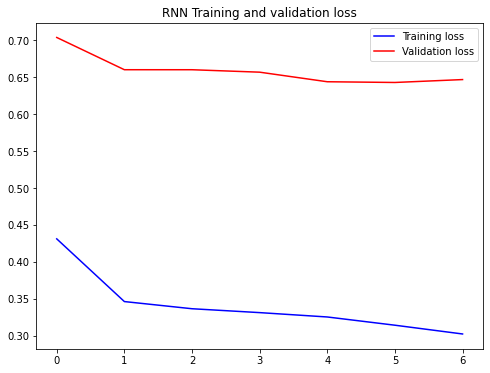

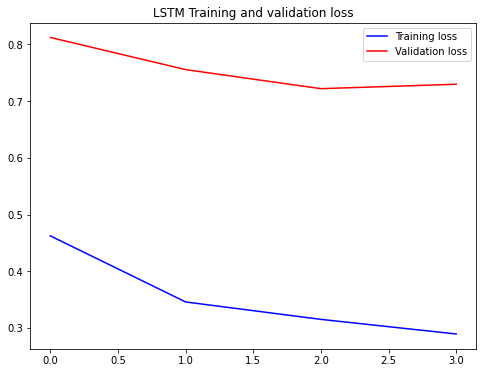

In [25]:
 plot_train_history(rnn_log,
                   'RNN Training and validation loss')
 plot_train_history(lstm_log,
                   'LSTM Training and validation loss')

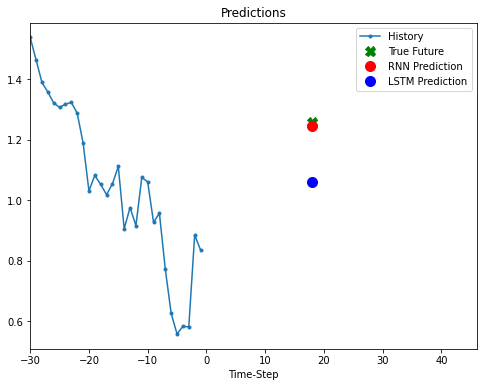

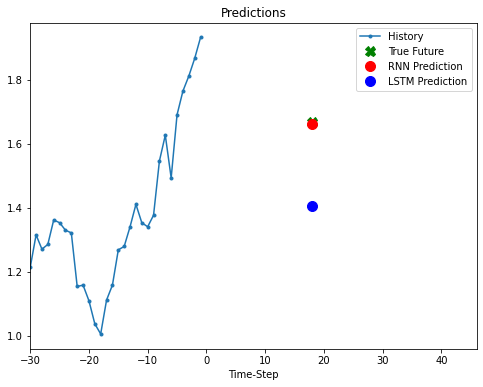

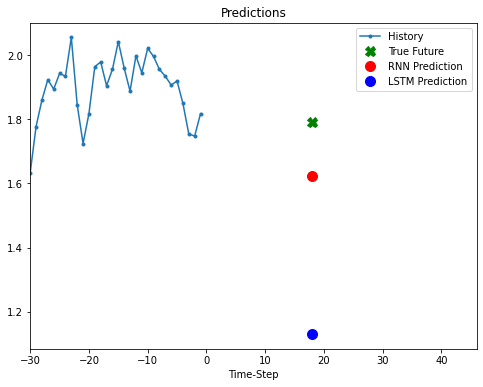

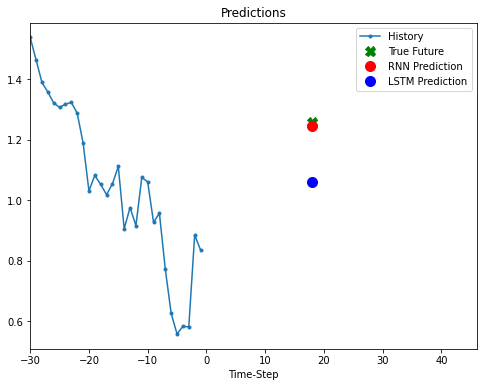

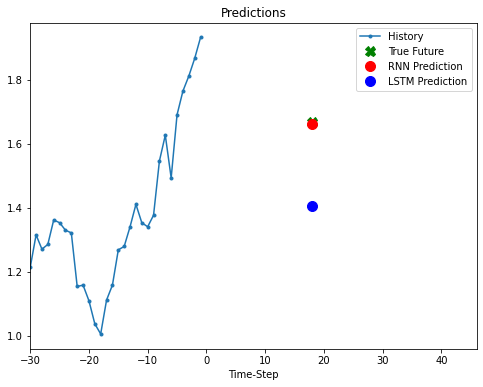

In [26]:
def plot_preds(plot_data, delta=0):
    labels = ['History', 'True Future', 'RNN Prediction','LSTM Prediction']
    marker = ['.-', 'gX', 'ro' , 'bo']
    time_steps = create_time_steps(plot_data[0].shape[0])
    

    future = delta

    plt.title('Predictions')
    for i, x in enumerate(plot_data):
      if i:
        plt.plot(future, plot_data[i], marker[i], markersize=10,
                label=labels[i])
      else:
        plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
    plt.legend()
    plt.xlim([time_steps[0], (future+5)*2])
    plt.xlabel('Time-Step')
    return plt

for x, y in val_univariate.take(5):
  plot = plot_preds([x[0].numpy(), y[0].numpy(),
                    simple_rnn_model.predict(x)[0], simple_lstm_model.predict(x)[0]], future)
  plot.show()

In [27]:
#Calculs uma taxa de erro

err_rnn=0
err_lstm=0

for x, y in val_univariate.take(100):
  err_rnn += abs(y[0].numpy() - simple_rnn_model.predict(x)[0])
  err_lstm += abs(y[0].numpy() - simple_lstm_model.predict(x)[0])
  
err_rnn = err_rnn/100
err_lstm = err_lstm/100
  
print(err_rnn)
print(err_lstm)
  

[0.06292271]
[0.37261027]


In [28]:
# Target em n dias 

ultData = np.reshape(uni_data[-1*univariate_past_history:],(1,univariate_past_history,1))

prevRnn = (simple_rnn_model.predict(ultData))* uni_train_std + uni_train_mean
prevLstm = (simple_lstm_model.predict(ultData))* uni_train_std + uni_train_mean


print('Previsão para {} dias\nRNN: {}\nLSTM: {}'.format(future,float(prevRnn[0]), float(prevLstm[0])))

Previsão para 18 dias
RNN: 19.491666793823242
LSTM: 17.485820770263672


In [29]:
#Salvar o modelo 

simple_lstm_model.save('model') #pesos

jsmodel=simple_lstm_model.to_json()  #jsom
with open('model_config.json', 'w') as json_file:
    json_file.write(jsmodel)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: model/assets
